[**Demo %s**](#demo-evd-bauerfike)


```{index} MATLAB; adjoint, MATLAB; \'
```

We first define a hermitian matrix. Note that the `'` operation is the adjoint and includes complex conjugation.

In [2]:
n = 7;
A = randn(n, n) + 1i * randn(n, n);
A = (A + A') / 2;

We confirm that the matrix $\mathbf{A}$ is normal by checking that $\kappa(\mathbf{V}) = 1$ (to within roundoff).

In [3]:
[V, D] = eig(A);
lambda = diag(D);
cond(V)

ans = 1.0000

Now we perturb $\mathbf{A}$ and measure the effect on the eigenvalues. The Bauer–Fike theorem uses absolute differences, not relative ones. Note: since the ordering of eigenvalues can change, we look at all pairwise differences and take the minima.

In [4]:
E = randn(n, n) + 1i * randn(n, n);
E = 1e-8 * E / norm(E);
dd = eig(A + E);
dist = [];
for j = 1:n
    dist = [dist; min(abs(dd - lambda(j)))];
end
dist

dist = 7×1 double
1.0e-08 *

    0.2356
    0.1025
    0.1895
    0.0512
    0.0388
    0.2337
    0.2547

As promised, the perturbations in the eigenvalues do not exceed the normwise perturbation to the original matrix.

Now we see what happens for a triangular matrix.

In [5]:
n = 20;
x = (1:n)';
A = triu(x * ones(1, n));
A(1:5, 1:5)

ans = 5×5 double
     1     1     1     1     1
     0     2     2     2     2
     0     0     3     3     3
     0     0     0     4     4
     0     0     0     0     5

This matrix is not at all close to normal.

In [6]:
[V, D] = eig(A);
lambda = diag(D);
cond(V)

ans = 6.1499e+09

As a result, the eigenvalues can change by a good deal more.

In [7]:
E = randn(n, n) + 1i * randn(n, n);
E = 1e-8 * E / norm(E);
dd = eig(A + E);
dist = -Inf;
for j = 1:n
    dist = max(dist, min(abs(dd - lambda(j))));
end
fprintf("max change in eigenvalues: %.2e", dist)
fprintf("Bauer-Fike upper bound: %.2e", cond(V) * norm(E))

max change in eigenvalues: 6.29e-01Bauer-Fike upper bound: 6.15e+01

If we plot the eigenvalues of many perturbations, we get a cloud of points that roughly represents all the possible eigenvalues when representing this matrix with single-precision accuracy.

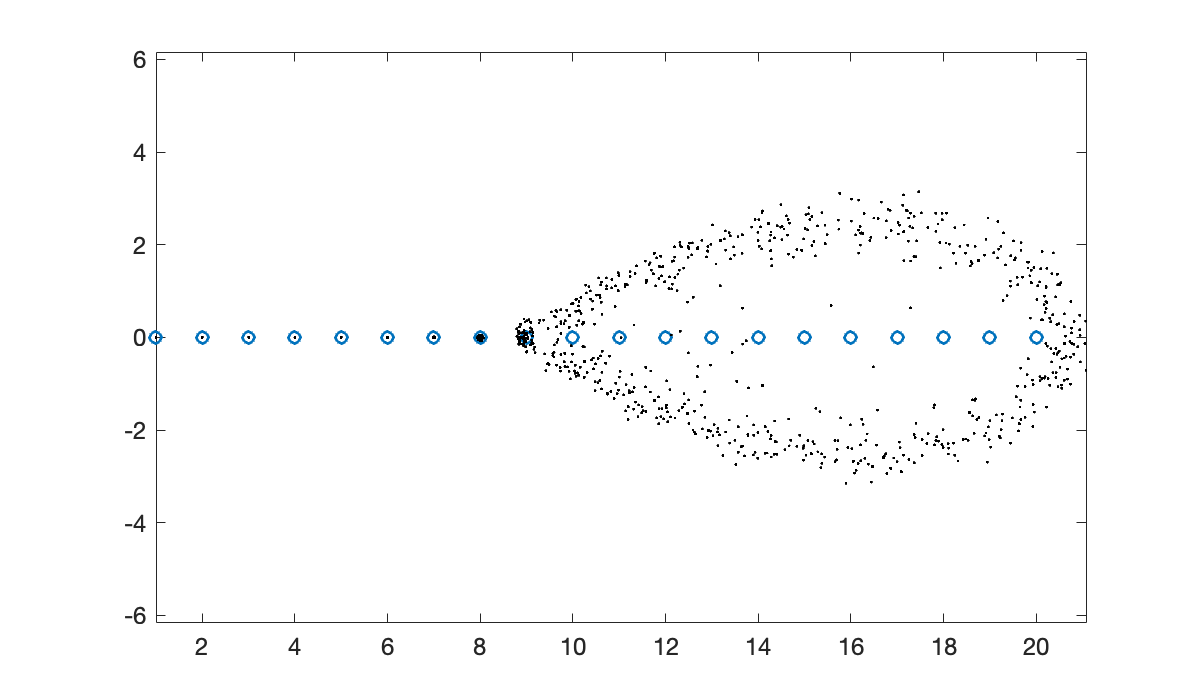

In [8]:
clf
plot(lambda, 0*lambda, 'o')
axis equal; hold on
for k = 1:60
    E = randn(n, n) + 1i * randn(n, n);
    E = eps(single(1)) * E / norm(E);
    dd = eig(A + E);
    plot(real(dd), imag(dd), 'k.', markersize=2)
end

The plot shows that some eigenvalues are much more affected than others. This situation is not unusual, but it is not explained by the Bauer–Fike theorem.